<h1>Final Project</h1>


<p>Address Food Insecurities in Las Vegas</p>
<p>Inspired by <a href="https://toogoodtogo.com/en">Too Good To Go</a>

<h2>Introduction/Business Problem</h2>
<p>The problem I would like to solve is the excess of Food Waste in the United States. United States has 126 million tons each year of foodwaste(415 kg per capita) (CEC, 2017). Everyone should care about this problem but the main stakeholders would be people in need of food, businesses that have food waste, potential food bank partners and volunteers, people who wish to donate, and companies like Uber, Postmates, and Grubhub with a lot of delivery drivers. My goal is to show the potential in a specific area by using Foursquare location data about businesses in a designated location. This project aims to take ideas from Too Good To Go and implement it in the most food insecure area in the Las Vegas Valley, zip code 89106, West Las Vegas. The Too Good To Go App helps fight food waste and states "Through our app, we connect our users with delicious unsold food from a variety of shops and restaurants all over Europe." I want to show that this can be viable based on the types of businesses near this area of Las Vegas as a test case for hopefully further implementation throughout the Las Vegas Valley and the country. The overall goal would also provide the businesses, companies and delivery drivers, tax write offs and perhaps other benefits for all the orders they provide. I am only using one location for purposes of demonstrating potential.</p>

<h1>Data</h1>
<p> I am taking the data from Three Square that found this location (89106) as the most food insecure in Las Vegas and will analyze that location through the Foursquare API to determine businesses that might be interested in this type of program. I also feel that this could be taken to another level by allowing delivery drivers from Uber Eats, Postmates, and Grubhub to help facilitate deliveries to users as well. I do however, not believe I will have access to the number of delivery drivers and other data from those companies but hopefully will after this first process to better enrich the viability of the delivery driver idea. </p>

<h1>Methodology</h1>
<p>Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.</p>

<h1>Results</h1>
<p>Results section where you discuss the results.</p>

<h1>Discussion</h1>
<p>Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.</p>

<h1>Conclusion</h1>
<p>Conclusion section where you conclude the report.</p>

<p> Import Packages</p>

In [217]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<p> Read in data </p>

In [104]:
df = pd.read_csv('foodthreesquare.csv')

In [105]:
df

ZipCode  PercentageInsecurities           City  \
0    89106                    25.5  Las Vegas, NV   

                       Neighborhood  Latitude  Longitude TotalPopulation  \
0  Bonanza Village | West Las Vegas  36.18102 -115.16396          25,759   

   ApproxInNeed  
0          6569

In [106]:
df.shape

(1, 8)

In [52]:
# df.columns.tolist()
# df.rename(columns={'location.1':'location_type'}, inplace=True)

<h1> West Las Vegas Valley on Map </h1>

In [107]:
address = '89106'

geolocator = Nominatim(user_agent="vegas_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of West Las Vegas is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of West Las Vegas is 36.167241238029, -115.163725782405.


<p>Create a map of West Las Vegas </p>

In [110]:
# create map of West Las Vegas using latitude and longitude values
map_usa = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, city, neighborhood, foodinsecurities, totalpop, amntneed in zip(df['Latitude'], df['Longitude'], df['City'], df['Neighborhood'], df['PercentageInsecurities'], df['TotalPopulation'], df['ApproxInNeed']):
    label = 'City: {}\n, Neighborhood: {}\n, Total Population: {}\n, Food Insecurities Percentage: {}\n, Amount in Need: {}\n'.format(city, neighborhood, totalpop, foodinsecurities, amntneed)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)  
    
map_usa

<h1> Foursquare Credentials </h1>

In [69]:
CLIENT_ID = 'AKCHGOQTMSIPHHI4V4J4DNUDEYRHIHEBVWCJ4N1DAXNUWRGZ' # your Foursquare ID
CLIENT_SECRET = 'HM2OPJAHE0OB1BRPQYCR11GTGQ5XFDADU51NKBC20GDHTA4H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AKCHGOQTMSIPHHI4V4J4DNUDEYRHIHEBVWCJ4N1DAXNUWRGZ
CLIENT_SECRET:HM2OPJAHE0OB1BRPQYCR11GTGQ5XFDADU51NKBC20GDHTA4H


<p> Search for top 50 Food Venues near West Las Vegas </p>

In [84]:
# type your answer here

LIMIT = 50 # limit of number of venues returned by Foursquare API



# radius = 500 # define radius

query = 'Food' #



 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
#     radius, 
    LIMIT,
    query)
url # display URL





'https://api.foursquare.com/v2/venues/explore?&client_id=AKCHGOQTMSIPHHI4V4J4DNUDEYRHIHEBVWCJ4N1DAXNUWRGZ&client_secret=HM2OPJAHE0OB1BRPQYCR11GTGQ5XFDADU51NKBC20GDHTA4H&v=20180605&ll=36.167241238029,-115.163725782405&limit=50&query=Food'

<p> Send Get Request </p>

In [85]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d744527475abd002c0103b4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 2006,
  'headerLocation': 'Las Vegas',
  'headerFullLocation': 'Las Vegas',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 100,
  'suggestedBounds': {'ne': {'lat': 36.17560669793198,
    'lng': -115.14005040803968},
   'sw': {'lat': 36.151039565006215, 'lng': -115.17641287210336}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '554183f6498e26c4eb31f35b',
       'name': 'The Cheesecake Factory',
       'location': {'address': '505 S Grand Central Pkwy',
        'crossStreet': 'at W Bonneville Ave',
    

<p>Get Category Type from Foursquare </p>

In [86]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<p>Clean JSON and put in dataframe</p>

In [87]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name                 categories        lat  \
0        The Cheesecake Factory        American Restaurant  36.166072   
1  Lola's - A Louisiana Kitchen  Cajun / Creole Restaurant  36.158569   
2                  Omelet House             Breakfast Spot  36.159703   
3        Chipotle Mexican Grill         Mexican Restaurant  36.163280   
4                Real Donuts #1                 Donut Shop  36.158606   

          lng  
0 -115.157329  
1 -115.157928  
2 -115.171390  
3 -115.158879  
4 -115.166319

<p>Print number of values returned by Foursquare </p>

In [88]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


<p>Next 50 food results Query</p>

In [115]:
# type your answer here

LIMIT = 50 # limit of number of venues returned by Foursquare API



# radius = 500 # define radius

query = 'Food' #
offset = 50


 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&query={}&offset={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
#     radius, 
    LIMIT,
    query,
    offset)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=AKCHGOQTMSIPHHI4V4J4DNUDEYRHIHEBVWCJ4N1DAXNUWRGZ&client_secret=HM2OPJAHE0OB1BRPQYCR11GTGQ5XFDADU51NKBC20GDHTA4H&v=20180605&ll=36.167241238029,-115.163725782405&limit=50&query=Food&offset=50'

In [116]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d7452ba787dba003846360f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 2006,
  'headerLocation': 'Las Vegas',
  'headerFullLocation': 'Las Vegas',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 100,
  'suggestedBounds': {'ne': {'lat': 36.184945564332594,
    'lng': -115.14030136341358},
   'sw': {'lat': 36.14951314901545, 'lng': -115.18531822078984}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d644c8f8018548103f64868',
       'name': "Capriotti's Sandwich Shop",
       'location': {'address': '200 Lewis Ave.',
        'crossStreet': 'at the Regional Justice Center',


In [117]:
venuesf = results['response']['groups'][0]['items']
    
nearby_venuesf = json_normalize(venuesf) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venuesf =nearby_venuesf.loc[:, filtered_columns]

# filter the category for each row
nearby_venuesf['venue.categories'] = nearby_venuesf.apply(get_category_type, axis=1)

# clean columns
nearby_venuesf.columns = [col.split(".")[-1] for col in nearby_venuesf.columns]

nearby_venuesf.head()

name           categories        lat         lng
0  Capriotti's Sandwich Shop       Sandwich Place  36.166837 -115.146072
1               Claim Jumper  American Restaurant  36.170226 -115.144570
2               Jimmy John's       Sandwich Place  36.171642 -115.146349
3               Kung Pao Wok   Chinese Restaurant  36.163830 -115.157838
4              Binion's Café                Diner  36.170849 -115.144471

<p>Query Loop for Food in Nearby Area and stored in dataframe</p>

In [ ]:
search_query = ['Food','American Restaurant','Mexican Restaurant', 'Afghan Restaurant','African Restaurant', 
                'Ethiopian Restaurant', 'American Restaurant', 'New American Restaurant', 'Asian Restaurant',
                'Chinese Restaurant', 'Filipino Restaurant', 'Japanese Restaurant', 'Korean Restaurant', 
                'Thai Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bistro', 'Breakfast Spot', 
                'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant',
                'Caribbean Restaurant', 'Coffee Shop', 'Deli / Bodega', 'Dessert Shop', 'Diner', 'Donut Shop',
                'English Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Food Truck', 'French Restaurant'
                'Fried Chicken Joint', 'Gastropub', 'German Restaurant', 'Greek Restaurant', 'Halal Restaurant',
                'Hawaiian Restaurant', 'Hot Dog Joint', 'Indian Restaurant', 'Irish Pub', 'Italian Restaurant', 
                'Jewish Restaurant', 'Juice Bar', 'Kebab Restaurant', 'Latin American Restaurant', 
                'Mediterranean Restaurant', 'Middle Eastern Restaurant', 'Pizza Place', 'Polish Restaurant', 
                'Portuguese Restaurant', 'Restaurant', 'Russian Restaurant', 'Salad Place',
                'Sandwich Place', 'Scandinavian Restaurant', 'Seafood Restaurant',
                'Snack Place', 'Soup Place', 'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse',
                'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Wings Joint', 'Food & Drink Shop', 'Butcher',
                'Gourmet Shop', 'Organic Grocery', 'Supermarket', 'Fruit & Vegetable Store', 'Gas Station',
                'Grocery Store']

In [348]:
search_query = ['Food']
LIMIT = 50 # limit of number of venues returned by Foursquare API


for i in search_query:
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        latitude,
        longitude,
        VERSION, 
        i,
        LIMIT)
    print(url)
    results = requests.get(url).json()
    print(results)
    venuesf = results['response']['groups'][0]['items']
    print(venuesf)
    
    nearby_venuesf = json_normalize(venuesf) # flatten JSON
    print(nearby_venuesf)

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
    print(filtered_columns)
    nearby_venuesf = nearby_venuesf.loc[:, filtered_columns]
    print(nearby_venuesf)

    # filter the category for each row
    nearby_venuesf['venue.categories'] = nearby_venuesf.apply(get_category_type, axis=1)
    print(nearby_venuesf)

    # clean columns
    nearby_venuesf.columns = [col.split(".")[-1] for col in nearby_venuesf.columns]
    print(nearby_venuesf)

    dfnew = dfnew.append(nearby_venuesf[['name','categories', 'lat', 'lng', 'postalCode']])
    print(dfnew)
    search_query=search_query[+1:+1]
    

https://api.foursquare.com/v2/venues/explore?client_id=AKCHGOQTMSIPHHI4V4J4DNUDEYRHIHEBVWCJ4N1DAXNUWRGZ&client_secret=HM2OPJAHE0OB1BRPQYCR11GTGQ5XFDADU51NKBC20GDHTA4H&ll=36.167241238029,-115.163725782405&v=20180605&query=Food&limit=50
{'meta': {'code': 200, 'requestId': '5d754859cf72a0003458b913'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}, {'name': '$-$$$$', 'key': 'price'}]}, 'suggestedRadius': 2006, 'headerLocation': 'Las Vegas', 'headerFullLocation': 'Las Vegas', 'headerLocationGranularity': 'city', 'query': 'food', 'totalResults': 100, 'suggestedBounds': {'ne': {'lat': 36.17560669793198, 'lng': -115.14005040803968}, 'sw': {'lat': 36.151039565006215, 'lng': -115.17641287210336}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '554183f6498e

                         categories        lat         lng  \
0                Mexican Restaurant  36.163280 -115.158879   
1              Fast Food Restaurant  36.158677 -115.165788   
2                Mexican Restaurant  36.165349 -115.161223   
0               American Restaurant  36.166072 -115.157329   
2                       Snack Place  36.164787 -115.157521   
3                        Donut Shop  36.158606 -115.166319   
5                    Sandwich Place  36.163780 -115.157750   
6              Fast Food Restaurant  36.158628 -115.164933   
7                Chinese Restaurant  36.163830 -115.157838   
8                        Food Court  36.163790 -115.157749   
10                             Café  36.168730 -115.160624   
11                        Cafeteria  36.163457 -115.165763   
12                             Food  36.171114 -115.160724   
13                       Food Truck  36.164148 -115.158806   
14                      Snack Place  36.164719 -115.157555   
15      

In [349]:
dfnew

categories        lat         lng  \
0                Mexican Restaurant  36.163280 -115.158879   
1              Fast Food Restaurant  36.158677 -115.165788   
2                Mexican Restaurant  36.165349 -115.161223   
0               American Restaurant  36.166072 -115.157329   
2                       Snack Place  36.164787 -115.157521   
3                        Donut Shop  36.158606 -115.166319   
5                    Sandwich Place  36.163780 -115.157750   
6              Fast Food Restaurant  36.158628 -115.164933   
7                Chinese Restaurant  36.163830 -115.157838   
8                        Food Court  36.163790 -115.157749   
10                             Café  36.168730 -115.160624   
11                        Cafeteria  36.163457 -115.165763   
12                             Food  36.171114 -115.160724   
13                       Food Truck  36.164148 -115.158806   
14                      Snack Place  36.164719 -115.157555   
15                       Food Truck  36.173065 -115.163258   
16              Japanese Restaurant  36.163854 -115.157824   
17               Italian Restaurant  36.163777 -115.157801   
18              American Restaurant  36.163780 -115.157749   
19               Italian Restaurant  36.163735 -115.157773   
20                      Salad Place  36.163691 -115.157758   
21                           Bakery  36.163672 -115.157695   
22               Chinese Restaurant  36.163701 -115.157648   
23                   Sandwich Place  36.163679 -115.157626   
24                       Food Truck  36.161543 -115.167425   
25             Fast Food Restaurant  36.158539 -115.162642   
26                             Café  36.167337 -115.154809   
27                       Food Truck  36.174270 -115.161075   
28                             Food  36.162569 -115.156140   
29                       Food Truck  36.165128 -115.153826   
1               American Restaurant  36.162814 -115.159254   
2               American Restaurant  36.164738 -115.157486   
4               American Restaurant  36.168033 -115.156445   
5               American Restaurant  36.161194 -115.158331   
6               American Restaurant  36.165056 -115.153960   
1         Cajun / Creole Restaurant  36.158569 -115.157928   
2                Italian Restaurant  36.157538 -115.152859   
3                    Breakfast Spot  36.159703 -115.171390   
4                    Sandwich Place  36.159999 -115.147533   
5                       Pizza Place  36.171171 -115.147438   
6                English Restaurant  36.158601 -115.152934   
7     Vegetarian / Vegan Restaurant  36.167398 -115.139421   
8                       Pizza Place  36.171707 -115.142343   
9               American Restaurant  36.168976 -115.139580   
10                        Gastropub  36.167884 -115.140664   
11                 Arepa Restaurant  36.151359 -115.152556   
12               Seafood Restaurant  36.170096 -115.144961   
13                   Breakfast Spot  36.166927 -115.139055   
14                       Steakhouse  36.169942 -115.142740   
15             Fast Food Restaurant  36.144733 -115.172622   
16                       Restaurant  36.169958 -115.139704   
17                  Thai Restaurant  36.168839 -115.139921   
18                   Sandwich Place  36.144132 -115.161541   
19                   Breakfast Spot  36.171612 -115.146466   
20              American Restaurant  36.147353 -115.155528   
21                    Hot Dog Joint  36.167866 -115.138354   
22                        Gastropub  36.169220 -115.140416   
23                 Sushi Restaurant  36.145105 -115.176369   
24              Japanese Restaurant  36.142615 -115.157112   
25                     Burger Joint  36.144755 -115.180549   
26                 Sushi Restaurant  36.167797 -115.140322   
27               Seafood Restaurant  36.142957 -115.174576   
28                       Steakhouse  36.143407 -115.156939   
29  Southern / Soul Food Restaurant  36.193738 -115.16465

In [332]:
dfnew.shape

(2463, 4)

<p>Merge Datasets</p>

In [208]:
# data = [nearby_venues, nearby_venuesf]

# datamerge = pd.concat(data)

In [209]:
# datamerge

name  \
0                              The Cheesecake Factory   
1                        Lola's - A Louisiana Kitchen   
2                                        Omelet House   
3                              Chipotle Mexican Grill   
4                                      Real Donuts #1   
5                                    Esther's Kitchen   
6                                            Del Taco   
7                                    Cornish Pasty Co   
8                                            MTO Café   
9                                        Pop Up Pizza   
10                                       The Goodwich   
11                                      Casa Don Juan   
12                                      Auntie Anne's   
13                             Chart House Restaurant   
14                                 Hash House A Go Go   
15                                       Jason's Deli   
16                         Nozomi Japanese Restaurant   
17                    Joe Vicari's Andiamo Steakhouse   
18                                         Pizza Rock   
19                                      Chicago Joe's   
20                                  Broadway Pizzeria   
21                                             SUBWAY   
22                                      Hugo's Cellar   
23                  Rick's Rollin' Smoke BBQ & Tavern   
24                      Triple 7 Restaurant & Brewery   
25                                       Ocha Cuisine   
26                                       Boston Pizza   
27                         Vic & Anthony's Steakhouse   
28                                  Aloha Specialties   
29                                 Market Street Cafe   
30                                Triple George Grill   
31                                       White Castle   
32                     Florida Cafe Cuban Bar & Grill   
33                                             Le Pho   
34                              American Coney Island   
35                      Doña María Tamales Restaurant   
36                                       Jimmy John's   
37                                       The Goodwich   
38                                   Beef Jerky Store   
39                                New York Bagel Deli   
40                            Taqueria el Buen Pastor   
41                                  Grotto Ristorante   
42                                Roberto's Taco Shop   
43                                          Red Sushi   
44                                    Dougie J's Cafe   
45                                           Pad Thai   
46                                Garden Court Buffet   
47                                 Redwood Steakhouse   
48                                            Wendy's   
49                                            Quiznos   
0                           Capriotti's Sandwich Shop   
1                                        Claim Jumper   
2                                        Jimmy John's   
3                                        Kung Pao Wok   
4                                       Binion's Café   
5                                       Asada's Tacos   
6                                             Dunkin'   
7                                       Mix Zone Cafe   
8                  Zaba's Mexican Grill @ Plaza Hotel   
9                                              SUBWAY   
10                                             SUBWAY   
11                                 Binions Steakhouse   
12                                   City Center Cafe   
13                                         Albo Pizza   
14                                        The D Grill   
15                                         Food Court   
16                    Subway / Winchell's Donut House   
17                                         McDonald's   
18                                             SUBWAY   
19                                 Magnolia's Veranda   
20

In [335]:
# dropping ALL duplicte values 
dfnew.drop_duplicates(inplace = True) 

In [336]:
dfnew.shape

(1687, 4)

<p>Create Map with Locations</p>

In [337]:
# create map of West Las Vegas using latitude and longitude values
map_vegas = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name, categories in zip(dfnew['lat'], dfnew['lng'], dfnew['name'], dfnew['categories']):
    label = 'Name: {}\n, Category: {}\n'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vegas)  
    
map_vegas

<p>How many of each category are there?</p>

In [339]:
dfnew['categories'].value_counts()

American Restaurant                128
Mexican Restaurant                 112
Supermarket                         70
Sandwich Place                      53
Fast Food Restaurant                52
Pizza Place                         52
Food Truck                          52
Gas Station                         49
Bakery                              46
Vegetarian / Vegan Restaurant       44
Bubble Tea Shop                     43
Café                                42
Grocery Store                       41
Indian Restaurant                   39
Chinese Restaurant                  35
Hawaiian Restaurant                 33
Wings Joint                         29
Breakfast Spot                      28
Asian Restaurant                    27
Steakhouse                          26
Bagel Shop                          24
Japanese Restaurant                 23
Cajun / Creole Restaurant           23
Burger Joint                        22
Italian Restaurant                  22
Gastropub                

<p>How many types of names of businesses are there?</p>

In [340]:
dfnew['name'].value_counts()

Albertsons                                                           23
SUBWAY                                                               19
Smith's                                                              17
Denny's                                                              15
Popeyes Louisiana Kitchen                                            13
Walmart Supercenter                                                  11
Capriotti's Sandwich Shop                                            10
Panda Express                                                        10
ARCO                                                                  9
Walmart Neighborhood Market                                           9
Pacific Pride                                                         8
Chevron                                                               7
Church's Chicken                                                      7
Raising Cane's Chicken Fingers                                  

<p>Bar Chart of Categories in this Dataset</p>

In [341]:
df_categories = dfnew['categories'].value_counts()

In [342]:
df_categories

American Restaurant                128
Mexican Restaurant                 112
Supermarket                         70
Sandwich Place                      53
Fast Food Restaurant                52
Pizza Place                         52
Food Truck                          52
Gas Station                         49
Bakery                              46
Vegetarian / Vegan Restaurant       44
Bubble Tea Shop                     43
Café                                42
Grocery Store                       41
Indian Restaurant                   39
Chinese Restaurant                  35
Hawaiian Restaurant                 33
Wings Joint                         29
Breakfast Spot                      28
Asian Restaurant                    27
Steakhouse                          26
Bagel Shop                          24
Japanese Restaurant                 23
Cajun / Creole Restaurant           23
Burger Joint                        22
Italian Restaurant                  22
Gastropub                

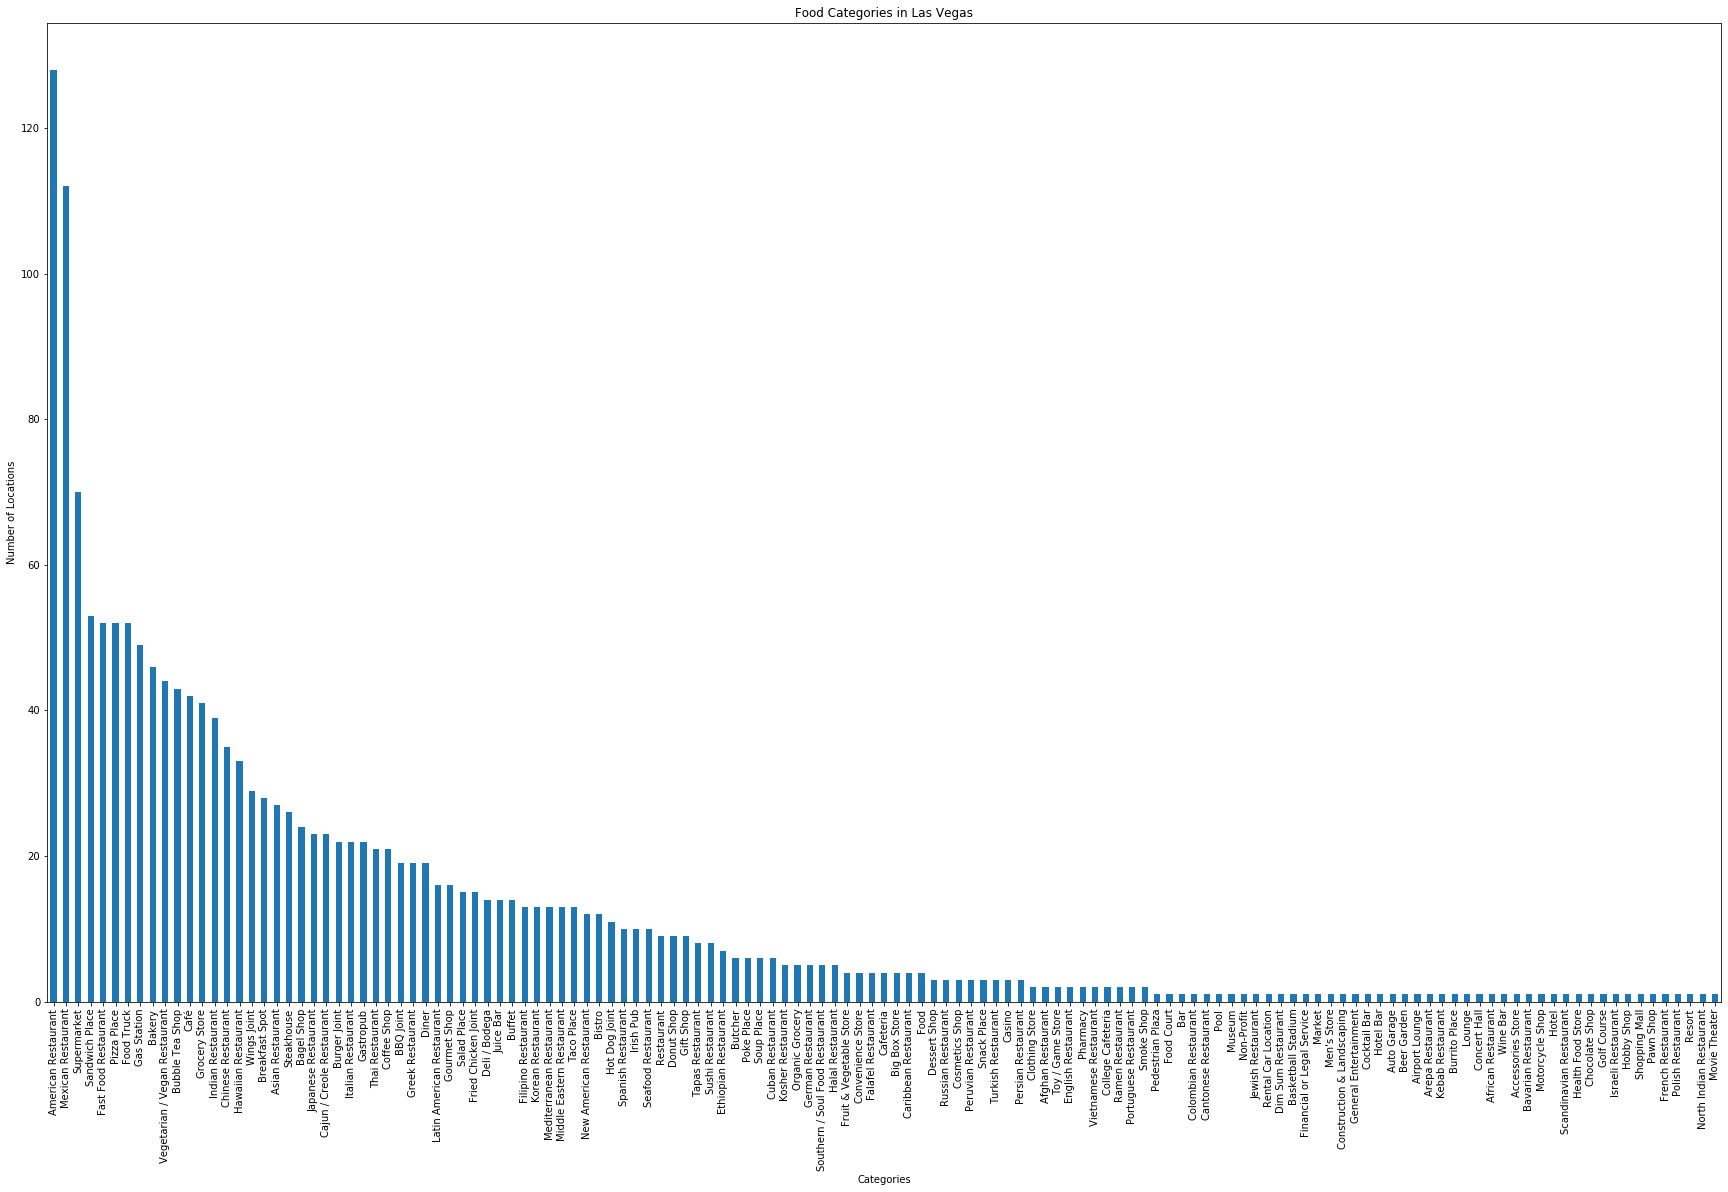

In [344]:
# step 2: plot data
df_categories.plot(kind='bar', figsize=(30, 18))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Number of Locations') # add y-label to the plot
plt.title('Food Categories in Las Vegas') # add title to the plot

plt.show()

<h1>Analyze each neighborhood</h1>

In [219]:
# one hot encoding
categories_onehot = pd.get_dummies(datamerge[['categories']], prefix="", prefix_sep="")

# # add neighborhood column back to dataframe
# toronto_onehot['Neighborhood'] = dtvenues_venues['Neighborhood'] 

# # move neighborhood column to the first column
# fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
# toronto_onehot = toronto_onehot[fixed_columns]

categories_onehot.head()

American Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                    1                 0          0           0       0   
1                    0                 0          0           0       0   
2                    0                 0          0           0       0   
3                    0                 0          0           0       0   
4                    0                 0          0           0       0   

   Big Box Store  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
0              0               0       0             0          0     0   
1              0               0       0             0          0     0   
2              0               1       0             0          0     0   
3              0               0       0             0          0     0   
4              0               0       0             0          0     0   

   Cajun / Creole Restaurant  Chinese Restaurant  Coffee Shop  \
0                          0                   0            0   
1                          1                   0            0   
2                          0                   0            0   
3                          0                   0            0   
4                          0                   0            0   

   Cuban Restaurant  Deli / Bodega  Diner  Donut Shop  English Restaurant  \
0                 0              0      0           0                   0   
1                 0              0      0           0                   0   
2                 0              0      0           0                   0   
3                 0              0      0           0                   0   
4                 0              0      0           1                   0   

   Fast Food Restaurant  Food  Food Court  Food Truck  Fried Chicken Joint  \
0                     0     0           0           0                    0   
1                     0     0           0           0                    0   
2                     0     0           0           0                    0   
3                     0     0           0           0                    0   
4                     0     0           0           0                    0   

   Gastropub  Golf Course  Grocery Store  Hawaiian Restaurant  Hot Dog Joint  \
0          0            0              0                    0              0   
1          0            0              0                    0              0   
2          0            0              0                    0              0   
3          0            0              0                    0              0   
4          0            0              0                    0              0   

   Italian Restaurant  Japanese Restaurant  Market  Mexican Restaurant  \
0                   0                    0       0                   0   
1                   0                    0       0                   0   
2                   0                    0       0                   0   
3                   0                    0       0                   1   
4                   0                    0       0                   0   

   New American Restaurant  Pharmacy  Pizza Place  Restaurant  Salad Place  \
0                        0         0            0           0            0   
1                        0         0            0           0            0   
2                        0         0            0           0            0   
3                        0         0            0           0            0   
4                        0         0            0           0            0   

   Sandwich Place  Seafood Restaurant  Shopping Mall  Snack Place  \
0               0                   0              0            0   
1               0                   0              0            0   
2               0                   0              0            0   
3               0                   0              0            0   
4               0                   0 

<p>Examine new dataframe shape</p>

In [220]:
categories_onehot.shape

(499, 49)

<p>Group by neighborhood and take mean frequency of category</p>

In [221]:
categories_grouped = categories_onehot.mean().reset_index()
categories_grouped

index         0
0               American Restaurant  0.190381
1                  Asian Restaurant  0.002004
2                         BBQ Joint  0.004008
3                        Bagel Shop  0.002004
4                            Bakery  0.002004
5                     Big Box Store  0.002004
6                    Breakfast Spot  0.010020
7                            Buffet  0.004008
8                      Burger Joint  0.010020
9                         Cafeteria  0.002004
10                             Café  0.008016
11        Cajun / Creole Restaurant  0.002004
12               Chinese Restaurant  0.006012
13                      Coffee Shop  0.002004
14                 Cuban Restaurant  0.002004
15                    Deli / Bodega  0.002004
16                            Diner  0.006012
17                       Donut Shop  0.004008
18               English Restaurant  0.002004
19             Fast Food Restaurant  0.178357
20                             Food  0.004008
21                       Food Court  0.002004
22                       Food Truck  0.006012
23              Fried Chicken Joint  0.004008
24                        Gastropub  0.002004
25                      Golf Course  0.002004
26                    Grocery Store  0.048096
27              Hawaiian Restaurant  0.004008
28                    Hot Dog Joint  0.004008
29               Italian Restaurant  0.008016
30              Japanese Restaurant  0.004008
31                           Market  0.002004
32               Mexican Restaurant  0.172345
33          New American Restaurant  0.004008
34                         Pharmacy  0.002004
35                      Pizza Place  0.114228
36                       Restaurant  0.004008
37                      Salad Place  0.002004
38                   Sandwich Place  0.112224
39               Seafood Restaurant  0.004008
40                    Shopping Mall  0.002004
41                      Snack Place  0.004008
42  Southern / Soul Food Restaurant  0.002004
43                       Sports Bar  0.002004
44                       Steakhouse  0.010020
45                      Supermarket  0.004008
46                       Taco Place  0.020040
47                  Thai Restaurant  0.008016
48            Vietnamese Restaurant  0.002004

<p>Confirm new size</p>

In [222]:
categories_grouped.shape

(49, 2)

<p>Print each neighborhood with top 5 common venues</p>

In [226]:
num_top_venues = 5

for hood in categories_grouped['index']:
    print("----"+hood+"----")
    temp = categories_grouped[categories_grouped['index'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 6})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----American Restaurant----
  venue      freq
0     0  0.190381


----Asian Restaurant----
  venue      freq
0     0  0.002004


----BBQ Joint----
  venue      freq
0     0  0.004008


----Bagel Shop----
  venue      freq
0     0  0.002004


----Bakery----
  venue      freq
0     0  0.002004


----Big Box Store----
  venue      freq
0     0  0.002004


----Breakfast Spot----
  venue     freq
0     0  0.01002


----Buffet----
  venue      freq
0     0  0.004008


----Burger Joint----
  venue     freq
0     0  0.01002


----Cafeteria----
  venue      freq
0     0  0.002004


----Café----
  venue      freq
0     0  0.008016


----Cajun / Creole Restaurant----
  venue      freq
0     0  0.002004


----Chinese Restaurant----
  venue      freq
0     0  0.006012


----Coffee Shop----
  venue      freq
0     0  0.002004


----Cuban Restaurant----
  venue      freq
0     0  0.002004


----Deli / Bodega----
  venue      freq
0     0  0.002004


----Diner----
  venue      freq
0     0  0.006012



<p>Put this in dataframe</p>

In [230]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [233]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['index']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
categories_venues_sorted = pd.DataFrame(columns=columns)
categories_venues_sorted['index'] = categories_grouped['index']

for ind in np.arange(categories_grouped.shape[0]):
    categories_venues_sorted.iloc[ind, 1:] = return_most_common_venues(categories_grouped.iloc[ind, :], num_top_venues)

categories_venues_sorted.head()

index 1st Most Common Venue 2nd Most Common Venue  \
0  American Restaurant                     0                     0   
1     Asian Restaurant                     0                     0   
2            BBQ Joint                     0                     0   
3           Bagel Shop                     0                     0   
4               Bakery                     0                     0   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

  9th Most Common Venue 10th Most Common Venue  
0                     0                      0  
1                     0                      0  
2                     0                      0  
3                     0                      0  
4                     0                      0

<p>Cluster Neighborhoods</p>

In [234]:
# set number of clusters
kclusters = 5

categories_grouped_clustering = categories_grouped.drop('index', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(categories_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 3, 3, 3, 0, 3, 0, 3])

<p>New dataframe for Clusters</p>

In [235]:
# add clustering labels
categories_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

categories_merged = datamerge

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
categories_merged = categories_merged.join(categories_venues_sorted.set_index('index'), on='index')

categories_merged.head() # check the last columns!

KeyError: 'index'

<p>Visualize Clusters</p>

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<p>Examine Clusters</p>

<h1>Cluster 1</h1>

In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
1   Downtown Toronto               0           Coffee Shop   
2   Downtown Toronto               0           Coffee Shop   
3   Downtown Toronto               0           Coffee Shop   
4   Downtown Toronto               0           Coffee Shop   
5   Downtown Toronto               0           Coffee Shop   
6   Downtown Toronto               0           Coffee Shop   
7   Downtown Toronto               0           Coffee Shop   
8   Downtown Toronto               0           Coffee Shop   
9   Downtown Toronto               0           Coffee Shop   
10  Downtown Toronto               0           Coffee Shop   
11  Downtown Toronto               0           Coffee Shop   
15  Downtown Toronto               0           Coffee Shop   
16  Downtown Toronto               0           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1             Restaurant                   Pub                  Café   
2    Japanese Restaurant      Sushi Restaurant               Gay Bar   
3                    Pub                  Park                Bakery   
4         Clothing Store        Cosmetics Shop                  Café   
5             Restaurant                  Café                 Hotel   
6           Cocktail Bar                Bakery    Seafood Restaurant   
7         Ice Cream Shop    Italian Restaurant                  Café   
8                   Café                   Bar            Steakhouse   
9                  Hotel              Aquarium                  Café   
10                  Café                 Hotel            Restaurant   
11                  Café                 Hotel            Restaurant   
15            Restaurant                  Café                 Hotel   
16                  Café                 Hotel            Restaurant   

        5th Most Common Venue 6th Most Common Venue  \
1          Italian Restaurant                Bakery   
2                  Restaurant           Men's Store   
3                        Café  Gym / Fitness Center   
4   Middle Eastern Restaurant                 Diner   
5          Italian Restaurant        Cosmetics Shop   
6                    Beer Bar           Cheese Shop   
7              Sandwich Place          Burger Joint   
8             Thai Restaurant        Cosmetics Shop   
9                     Brewery        Scenic Lookout   
10                        Bar             Gastropub   
11              Deli / Bodega    Seafood Restaurant   
15         Seafood Restaurant    Italian Restaurant   
16               Burger Joint                   Bar   

        7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1                 Pizza Place             Gastropub        Breakfast Spot   
2                       Hotel             Gastropub  Fast Food Restaurant   
3                     Theater    Mexican Restaurant            Restaurant   
4                      Bakery   Sporting Goods Shop                 Plaza   
5                   Gastropub        Breakfast Spot        Clothing Store   
6                        Café            Steakhouse        Farmers Market   
7   Middle Eastern Restaurant                   Spa     Indian Restaurant   
8                  Restaurant   American Restaurant                 Hotel   
9         Fried Chicken Joint           Music Venue                  Park   
10                     Bakery         Deli / Bodega   American Restaurant   
11                  Gastropub            Steakhouse                   Gym   
15                   Beer Bar          Cocktail Bar        Farmers Market   
16                 Steakhouse         Deli / Bodega   American Restaurant   

   10th Most Common Venue  
1                 Butcher  
2            Dance Studio  
3          Breakfast Spot  
4               Bookstore  
5                Beer Bar  
6                    Park  
7     Japanese Restaurant  
8            Burger Joint  
9     Sporting Goods Shop  
10   

<h1>Cluster 2</h1>

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0  Downtown Toronto               1                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Playground                 Trail              Building   

  5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0           Wings Joint         Deli / Bodega  Eastern European Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Dumpling Restaurant            Donut Shop       Doner Restaurant

<h1>Cluster 3</h1>

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
14  Downtown Toronto               2       Airport Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
14        Airport Lounge              Boutique       Harbor / Marina   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
14               Airport    Airport Food Court          Airport Gate   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
14      Airport Terminal      Sculpture Garden                    Bar

<h1>Cluster 4</h1>

In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
12  Downtown Toronto               3                  Café   
13  Downtown Toronto               3                  Café   

            2nd Most Common Venue 3rd Most Common Venue  \
12            Japanese Restaurant                   Bar   
13  Vegetarian / Vegan Restaurant                   Bar   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
12                 Bakery            Restaurant             Bookstore   
13  Vietnamese Restaurant    Mexican Restaurant   Dumpling Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
12        Sandwich Place    Chinese Restaurant    Italian Restaurant   
13    Chinese Restaurant                Bakery           Coffee Shop   

   10th Most Common Venue  
12           Dessert Shop  
13           Burger Joint

<h1>Cluster 5</h1>

In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
17  Downtown Toronto               4         Grocery Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
17                  Café                  Park            Baby Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
17    Athletics & Sports            Restaurant                  Bank   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
17                 Diner             Nightclub      Convenience Store